# Principal Component Analysis Practical Course
For this practical course we will use Principal Component Analysis (PCA) to visualize the patients described in the Chronic_Kidney_Disease dadaset.

It is **important to note that we will NOT use the labels for the PCA.** 

## Import Libraries

### Import the libraries you usually use for data analysis.

In [1]:
import os
from sklearn.metrics import silhouette_samples, silhouette_score # basic ML models
import pandas as pd # data frame
import numpy as np # manipulate N-dimensional arrays
import matplotlib.pyplot as plt # data plotting
import seaborn as sns # data visualization 
import scipy # scientific computing library
%matplotlib inline

## Data Acquisition and Pre-analysis

### Read in the "chronic_kidney_disease" file using read_csv.

In [2]:
df = pd.read_csv('chronic_kidney_disease.csv', header=0)

### Characteristics of the data

1.Age(numerical) 
age in years 

2.Blood Pressure(numerical) 
bp in mm/Hg 

3.Specific Gravity(nominal??) 
sg - (1.005,1.010,1.015,1.020,1.025) 

4.Albumin(nominal??) 
al - (0,1,2,3,4,5) 

5.Sugar(nominal??) 
su - (0,1,2,3,4,5) 

6.Red Blood Cells(nominal) 
rbc - (normal,abnormal) 

7.Pus Cell (nominal) 
pc - (normal,abnormal) 

8.Pus Cell clumps(nominal) 
pcc - (present,notpresent) 

9.Bacteria(nominal) 
ba - (present,notpresent) 

10.Blood Glucose Random(numerical)	
bgr in mgs/dl 

11.Blood Urea(numerical)	
bu in mgs/dl

12.Serum Creatinine(numerical)	
sc in mgs/dl

13.Sodium(numerical) 
sod in mEq/L 

14.Potassium(numerical)	
pot in mEq/L 

15.Hemoglobin(numerical) 
hemo in gms 

16.Packed Cell Volume(numerical) 

17.White Blood Cell Count(numerical) 
wc in cells/cumm 

18.Red Blood Cell Count(numerical)	
rc in millions/cmm 

19.Hypertension(nominal)	
htn - (yes,no) 

20.Diabetes Mellitus(nominal)	
dm - (yes,no) 

21.Coronary Artery Disease(nominal) 
cad - (yes,no) 

22.Appetite(nominal)	
appet - (good,poor) 

23.Pedal Edema(nominal) 
pe - (yes,no)	

24.Anemia(nominal) 
ane - (yes,no) 

### Check the head of the data

In [3]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


### Check the info() and describe() methods on the data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     330 non-null    object 
 16  wbcc    295 non-null    object 
 17  rbcc    270 non-null    object 
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

In [5]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


## Data Preparation

### Separate the labels from the variables (unsupervised problem)

In [6]:
data = df.drop("class", axis =1)
labels = df["class"]


### Replace missing values with a median (or means , zeros, etc.)

#### Handling numerical attributes

In [7]:
# Replace missing values with a median (or means , zeros, etc.)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
#Create a copy without text attribute
#Nominal attributes:"rbc","pc","pcc","ba","htn","dm", "cad", "appet", "pe", "ane"
data_num = data[["age", "bp","sg", "al", "su", "bgr", "bu", "sc", "sod", "pot", "hemo","pcv", "wbcc", "rbcc"]]

In [8]:
data_num.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [9]:
#fit the imputer instance to the data
imputer.fit(data_num)
#imputer.statistics_
data_num.median().values

array([5.500e+01, 8.000e+01, 1.020e+00, 0.000e+00, 0.000e+00, 1.210e+02,
       4.200e+01, 1.300e+00, 1.380e+02, 4.400e+00, 1.265e+01, 4.000e+01,
       8.000e+03, 4.800e+00])

In [10]:
#trasform the dataset by replacing the missing values by the medians
X = imputer.transform(data_num)
data_num_tr = pd.DataFrame(X, columns = data_num.columns)

In [11]:
data_num_tr.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000
mean,51.562500,76.575000,1.017712,0.90000,0.395000,145.062500,56.693000,2.997125,137.631250,4.577250,12.54250,39.082500,8298.500000,4.737750
std,16.982996,13.489785,0.005434,1.31313,1.040038,75.260774,49.395258,5.628886,9.206332,2.821357,2.71649,8.162245,2529.593814,0.841439
min,2.000000,50.000000,1.005000,0.00000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.10000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.015000,0.00000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.87500,34.000000,6975.000000,4.500000
50%,55.000000,80.000000,1.020000,0.00000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.65000,40.000000,8000.000000,4.800000
75%,64.000000,80.000000,1.020000,2.00000,0.000000,150.000000,61.750000,2.725000,141.000000,4.800000,14.62500,44.000000,9400.000000,5.100000
max,90.000000,180.000000,1.025000,5.00000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.80000,54.000000,26400.000000,8.000000


#### Handling categorical attributes

In [12]:
data_cat = data[["rbc","pc","pcc","ba","htn","dm", "cad", "appet", "pe", "ane"]]
print('Original values : ')
print(data_cat)
data_cat = data_cat.apply(lambda x: pd.factorize(x)[0])
#Use the pandas functions : factorize(), Imputer with the "most_frequent" strategy to preprocess and
#transform the categorical attributes
from sklearn.impute import SimpleImputer
imputer_freq = SimpleImputer(strategy="most_frequent")
imputer_freq.fit(data_cat)
print("After handling")
print(data_cat)

Original values : 
        rbc        pc         pcc          ba  htn   dm cad appet   pe  ane
0       NaN    normal  notpresent  notpresent  yes  yes  no  good   no   no
1       NaN    normal  notpresent  notpresent   no   no  no  good   no   no
2    normal    normal  notpresent  notpresent   no  yes  no  poor   no  yes
3    normal  abnormal     present  notpresent  yes   no  no  poor  yes  yes
4    normal    normal  notpresent  notpresent   no   no  no  good   no   no
..      ...       ...         ...         ...  ...  ...  ..   ...  ...  ...
395  normal    normal  notpresent  notpresent   no   no  no  good   no   no
396  normal    normal  notpresent  notpresent   no   no  no  good   no   no
397  normal    normal  notpresent  notpresent   no   no  no  good   no   no
398  normal    normal  notpresent  notpresent   no   no  no  good   no   no
399  normal    normal  notpresent  notpresent   no   no  no  good   no   no

[400 rows x 10 columns]
After handling
     rbc  pc  pcc  ba  htn  d

In [13]:
#replace missing categorical values by the most frequent ones

#fit the imputer instance to the data

# trasform the dataset by replacing the missing values by the most frequent values


In [14]:
# Merge the numerical and categorical datasets
print(data_num)
print("Data num len : "+str(len(data_num)))
print("Data cat len : "+str(len(data_cat)))
data_tr = pd.concat([data_num, data_cat], axis=1)
print(data_tr)

      age    bp     sg   al   su    bgr    bu   sc    sod  pot  hemo pcv  \
0    48.0  80.0  1.020  1.0  0.0  121.0  36.0  1.2    NaN  NaN  15.4  44   
1     7.0  50.0  1.020  4.0  0.0    NaN  18.0  0.8    NaN  NaN  11.3  38   
2    62.0  80.0  1.010  2.0  3.0  423.0  53.0  1.8    NaN  NaN   9.6  31   
3    48.0  70.0  1.005  4.0  0.0  117.0  56.0  3.8  111.0  2.5  11.2  32   
4    51.0  80.0  1.010  2.0  0.0  106.0  26.0  1.4    NaN  NaN  11.6  35   
..    ...   ...    ...  ...  ...    ...   ...  ...    ...  ...   ...  ..   
395  55.0  80.0  1.020  0.0  0.0  140.0  49.0  0.5  150.0  4.9  15.7  47   
396  42.0  70.0  1.025  0.0  0.0   75.0  31.0  1.2  141.0  3.5  16.5  54   
397  12.0  80.0  1.020  0.0  0.0  100.0  26.0  0.6  137.0  4.4  15.8  49   
398  17.0  60.0  1.025  0.0  0.0  114.0  50.0  1.0  135.0  4.9  14.2  51   
399  58.0  80.0  1.025  0.0  0.0  131.0  18.0  1.1  141.0  3.5  15.8  53   

     wbcc rbcc  
0    7800  5.2  
1    6000  NaN  
2    7500  NaN  
3    6700  3.9  
4 

### Save the final table (to_csv())

In [15]:
data_tr.to_csv('chronic_kidney_disease_final.csv')

### Data Visualization

It's time to create some data visualizations!


      age    bp     sg   al   su    bgr    bu   sc    sod  pot  ...  rbc pc  \
0    48.0  80.0  1.020  1.0  0.0  121.0  36.0  1.2    NaN  NaN  ...   -1  0   
1     7.0  50.0  1.020  4.0  0.0    NaN  18.0  0.8    NaN  NaN  ...   -1  0   
2    62.0  80.0  1.010  2.0  3.0  423.0  53.0  1.8    NaN  NaN  ...    0  0   
3    48.0  70.0  1.005  4.0  0.0  117.0  56.0  3.8  111.0  2.5  ...    0  1   
4    51.0  80.0  1.010  2.0  0.0  106.0  26.0  1.4    NaN  NaN  ...    0  0   
..    ...   ...    ...  ...  ...    ...   ...  ...    ...  ...  ...  ... ..   
395  55.0  80.0  1.020  0.0  0.0  140.0  49.0  0.5  150.0  4.9  ...    0  0   
396  42.0  70.0  1.025  0.0  0.0   75.0  31.0  1.2  141.0  3.5  ...    0  0   
397  12.0  80.0  1.020  0.0  0.0  100.0  26.0  0.6  137.0  4.4  ...    0  0   
398  17.0  60.0  1.025  0.0  0.0  114.0  50.0  1.0  135.0  4.9  ...    0  0   
399  58.0  80.0  1.025  0.0  0.0  131.0  18.0  1.1  141.0  3.5  ...    0  0   

    pcc ba  htn  dm  cad  appet  pe  ane  
0     0 

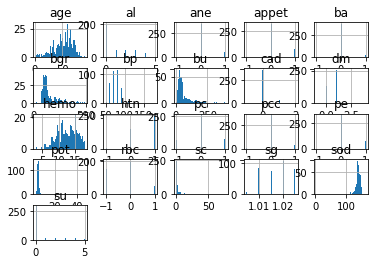

In [16]:
print(data_tr)
#Plot a histogram for each attribute
data_tr.hist(bins=50)
data_tr = data_tr.dropna()
plt.show()
#"age", "bp","sg", "al", "su", "bgr", "bu", "sc", "sod", "pot", "hemo","pcv", "wbcc", "rbcc"
# "rbc","pc","pcc","ba","htn","dm", "cad", "appet", "pe", "ane"

### Data Normalization
Scale the data so that each feature has a single unit variance and zero mean

In [17]:
# Import the library
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_tr)
# Use StandardScaler
scaled_data = scaler.transform(data_tr)
print(scaled_data)
n = scaled_data.shape[0]
#nombre de variables
p = scaled_data.shape[1]
print("N  = "+str(n))
print("P = "+str(p))

[[-0.24720577 -0.42814088 -2.49305574 ...  2.50115788  2.50115788
   2.86990422]
 [ 0.52187885  1.3101111  -0.71730025 ... -0.36740172  2.50115788
  -0.31365073]
 [ 0.07324615  1.3101111   0.1705775  ...  2.50115788 -0.36740172
   2.86990422]
 ...
 [-2.55445964  0.44098511  0.1705775  ... -0.36740172 -0.36740172
  -0.31365073]
 [-2.23400771 -1.29726688  1.05845524 ... -0.36740172 -0.36740172
  -0.31365073]
 [ 0.39369808  0.44098511  1.05845524 ... -0.36740172 -0.36740172
  -0.31365073]]
N  = 203
P = 24


## PCA Application

### PCA Visualization
Visualize the data in a two-dimensional space with a single scatter-plot.

In [18]:
# Import the library
from sklearn.decomposition import PCA
# Use PCA
pca = PCA(n_components=24)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

In [19]:
scaled_data.shape

(203, 24)

In [20]:
x_pca.shape

(203, 24)

------------- Valeurs propres --------- 

[9.21205547 2.10998266 1.52453406 1.38358916 1.10213377 0.97852279
 0.92822176 0.83268862 0.76084344 0.73659282 0.66363295 0.54964952
 0.51233987 0.49498409 0.39506749 0.37515681 0.32227353 0.27031612
 0.24924291 0.19297584 0.15199158 0.13170867 0.12931153 0.11099644] 

-------------- Valeurs propres corrigés----------- 

[9.16667589 2.09958866 1.51702404 1.37677345 1.09670454 0.97370248
 0.92364924 0.8285867  0.75709544 0.73296428 0.66036382 0.54694189
 0.50981603 0.49254574 0.39312134 0.37330875 0.32068598 0.26898451
 0.24801511 0.19202522 0.15124285 0.13105986 0.12867453 0.11044966]


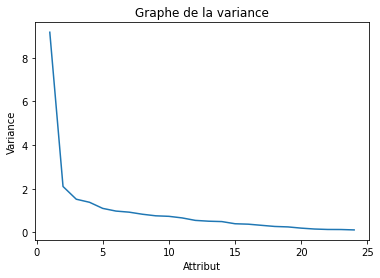

In [21]:
# Valeurs propres
print("------------- Valeurs propres --------- \n")
print(pca.explained_variance_,"\n")

corrected_variance = ((n-1)/n)*pca.explained_variance_
print("-------------- Valeurs propres corrigés----------- \n")
print(corrected_variance)
# Graphe de la variance de chaque attribut
plt.plot(np.arange(1,p+1),corrected_variance)
plt.title("Graphe de la variance")
plt.ylabel("Variance")
plt.xlabel("Attribut")
plt.show()

#### Give the coordinates of the individuals according to the first 2 principal components (1er et 2nd axes factoriels)

Text(0, 0.5, 'Second Principal Component')

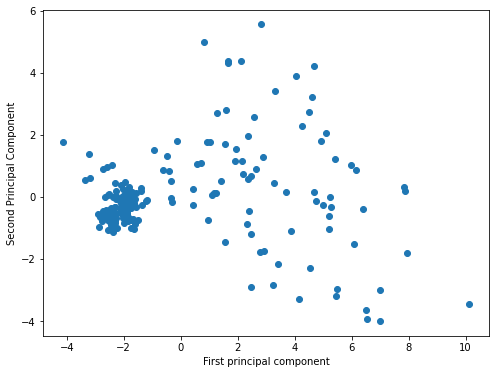

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

### Interprete the components  via global quality criteria

#### Give the 2 components coordinates

---------------- Les differentes composantes principales ------------- 

         age        bp        sg        al        su       bgr        bu  \
0   0.107497  0.123499 -0.251776  0.278563  0.162591  0.178937  0.245079   
1   0.306077  0.058641 -0.091740 -0.047353  0.450494  0.398137 -0.192774   
2   0.100633  0.026575  0.024885 -0.113344 -0.168062 -0.231614  0.198984   
3  -0.137057  0.304124  0.113377  0.041284  0.258417  0.160404  0.173348   
4   0.214296  0.430037 -0.031718 -0.078068 -0.139319 -0.145693 -0.131523   
5   0.039168 -0.440986  0.050389  0.022511 -0.050968 -0.067694 -0.180252   
6  -0.291953  0.232179  0.003034  0.067209  0.116620  0.010051 -0.136550   
7   0.462931  0.180300 -0.107228  0.039027 -0.181188 -0.287517  0.164336   
8   0.030775  0.258852  0.041051  0.015879 -0.036018  0.029191 -0.093069   
9   0.637037 -0.016014  0.208599 -0.010256 -0.106806  0.114563 -0.031989   
10  0.103330 -0.481299 -0.233322  0.037256 -0.006359  0.035965  0.125204   
11 -0.157804 -0

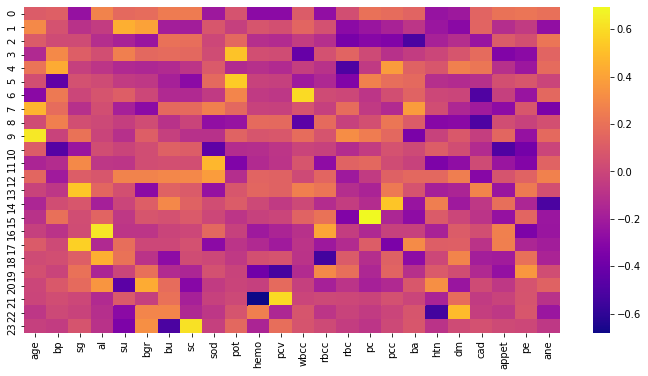

In [23]:
df_comp = pd.DataFrame(pca.components_,columns=data_tr.columns)
print("---------------- Les differentes composantes principales ------------- \n")
print(df_comp)
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

#### Plot the explained variance of each component

In [24]:

# Explained variance
print(pca.explained_variance_)

# Corrected variance values
corrected_variance = ((n-1)/n)*pca.explained_variance_
print(corrected_variance)

[9.21205547 2.10998266 1.52453406 1.38358916 1.10213377 0.97852279
 0.92822176 0.83268862 0.76084344 0.73659282 0.66363295 0.54964952
 0.51233987 0.49498409 0.39506749 0.37515681 0.32227353 0.27031612
 0.24924291 0.19297584 0.15199158 0.13170867 0.12931153 0.11099644]
[9.16667589 2.09958866 1.51702404 1.37677345 1.09670454 0.97370248
 0.92364924 0.8285867  0.75709544 0.73296428 0.66036382 0.54694189
 0.50981603 0.49254574 0.39312134 0.37330875 0.32068598 0.26898451
 0.24801511 0.19202522 0.15124285 0.13105986 0.12867453 0.11044966]


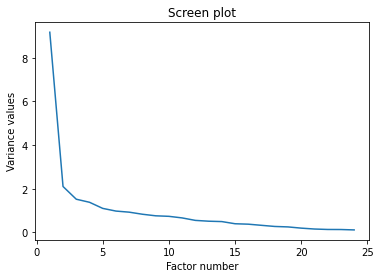

In [25]:
#Plot
# plot the explained variance of each component
plt.plot(np.arange(1,p+1),corrected_variance)
plt.title("Screen plot")
plt.ylabel("Variance values")
plt.xlabel("Factor number")
plt.show()

#### Plot the explained cumulative variance of each component in percentage

In [26]:
pca.explained_variance_ratio_*100

array([38.19448286,  8.74828608,  6.32093349,  5.73655603,  4.56960226,
        4.05709368,  3.84853848,  3.45244459,  3.15456433,  3.05401785,
        2.75151593,  2.27892453,  2.12423345,  2.05227392,  1.6380056 ,
        1.55545313,  1.33619157,  1.1207688 ,  1.03339629,  0.80010508,
        0.63017855,  0.54608274,  0.53614386,  0.46020691])

In [27]:
cumulative_var = np.cumsum(pca.explained_variance_ratio_*100)
cumulative_var

array([ 38.19448286,  46.94276894,  53.26370243,  59.00025846,
        63.56986071,  67.62695439,  71.47549287,  74.92793747,
        78.0825018 ,  81.13651965,  83.88803557,  86.1669601 ,
        88.29119355,  90.34346747,  91.98147307,  93.5369262 ,
        94.87311777,  95.99388657,  97.02728285,  97.82738794,
        98.45756649,  99.00364923,  99.53979309, 100.        ])

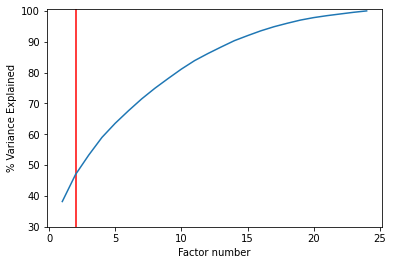

In [28]:
# plot the explained variance of each component
plt.ylabel('% Variance Explained')
plt.xlabel('Factor number')
plt.axvline(x=2.0,color='red')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(np.arange(1,p+1),cumulative_var)

### Variable representation

#### Compute the correlation between the principal components and the variables

In [29]:
# Compute the correlation of the variables with the principal axes
# the components_ field of the PCA object
print(pca.components_)
pca.components_
# Print the correlation matrix "variables x factors"


[[ 1.07497264e-01  1.23498788e-01 -2.51776339e-01  2.78563000e-01
   1.62590910e-01  1.78936650e-01  2.45078605e-01  2.46552578e-01
  -2.17475294e-01  6.07059192e-02 -2.89055870e-01 -2.88617637e-01
   1.02239032e-01 -2.67099131e-01  4.06638693e-02  2.02441093e-01
   1.81991821e-01  1.42969902e-01 -2.45587517e-01 -2.17733451e-01
   1.45079578e-01  2.06965287e-01  2.16307355e-01  1.96669639e-01]
 [ 3.06076512e-01  5.86411971e-02 -9.17404940e-02 -4.73529193e-02
   4.50493529e-01  3.98136887e-01 -1.92774068e-01 -1.94866359e-01
   8.06365743e-02 -3.14808694e-02  7.02528370e-02  4.43802568e-02
   1.50202214e-01  5.24003381e-02 -2.88463232e-01 -2.34734232e-01
  -1.67619623e-01 -7.96871417e-02 -2.26215583e-01 -2.92687901e-01
   1.41546865e-01 -1.13078893e-01 -5.05219795e-02 -2.66365648e-01]
 [ 1.00633095e-01  2.65748040e-02  2.48852246e-02 -1.13343634e-01
  -1.68062421e-01 -2.31614006e-01  1.98984251e-01  1.87360804e-01
   6.90628315e-03  1.60086604e-01 -1.11393183e-01 -1.24500961e-01
  -4.717

array([[ 1.07497264e-01,  1.23498788e-01, -2.51776339e-01,
         2.78563000e-01,  1.62590910e-01,  1.78936650e-01,
         2.45078605e-01,  2.46552578e-01, -2.17475294e-01,
         6.07059192e-02, -2.89055870e-01, -2.88617637e-01,
         1.02239032e-01, -2.67099131e-01,  4.06638693e-02,
         2.02441093e-01,  1.81991821e-01,  1.42969902e-01,
        -2.45587517e-01, -2.17733451e-01,  1.45079578e-01,
         2.06965287e-01,  2.16307355e-01,  1.96669639e-01],
       [ 3.06076512e-01,  5.86411971e-02, -9.17404940e-02,
        -4.73529193e-02,  4.50493529e-01,  3.98136887e-01,
        -1.92774068e-01, -1.94866359e-01,  8.06365743e-02,
        -3.14808694e-02,  7.02528370e-02,  4.43802568e-02,
         1.50202214e-01,  5.24003381e-02, -2.88463232e-01,
        -2.34734232e-01, -1.67619623e-01, -7.96871417e-02,
        -2.26215583e-01, -2.92687901e-01,  1.41546865e-01,
        -1.13078893e-01, -5.05219795e-02, -2.66365648e-01],
       [ 1.00633095e-01,  2.65748040e-02,  2.48852246e

#### Compute the correlation circle between the principal components and the variables

In [30]:
# Calcul de correlation des variables  
sqrt_cor_var = np.sqrt(corrected_variance) # ecart type
corvar = np.zeros((p,p))
for k in range(p):
  corvar[:,k] = pca.components_[k,:] * sqrt_cor_var[k]
# Matrice de correlation "variables x factors"
print(corvar)

[[ 3.25464293e-01  4.43503562e-01  1.23947297e-01 -1.60816617e-01
   2.24418361e-01  3.86495916e-02 -2.80586080e-01  4.21391077e-01
   2.67773870e-02  5.45388392e-01  8.39689590e-02 -1.16704921e-01
   1.09559505e-01 -9.98515145e-03 -9.60760139e-02 -5.87328468e-02
  -1.64132722e-02  5.26147932e-02  1.31845148e-02  1.93997589e-02
   1.44404502e-03 -1.36608328e-03 -2.62800023e-02 -9.71168287e-03]
 [ 3.73911337e-01  8.49708449e-02  3.27315296e-02  3.56846866e-01
   4.50350837e-01 -4.35148490e-01  2.23139640e-01  1.64121311e-01
   2.25230685e-01 -1.37100769e-02 -3.91116510e-01 -8.79225509e-02
  -1.49243502e-01 -4.90171290e-02  2.32061135e-02  1.18830383e-01
  -5.10425235e-02  9.29240688e-03  1.96984675e-02 -3.14512671e-03
   3.50293265e-02  1.18228146e-02  4.12467656e-03 -1.52896088e-02]
 [-7.62291107e-01 -1.32931585e-01  3.06505164e-02  1.33032284e-01
  -3.32165857e-02  4.97225149e-02  2.91598544e-03 -9.76060633e-02
   3.57186114e-02  1.78588574e-01 -1.89604123e-01  2.24337993e-01
   7.867

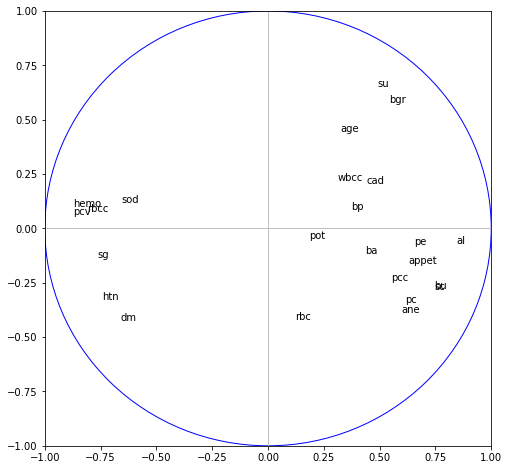

In [31]:
# Plot the correlation circle

# Correlation circle
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
# Print the labels (variable names)
for j in range(p):
     plt.annotate(data_tr.columns[j],(corvar[j,0],corvar[j,1]))

# Add the axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

# Add a circle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
# Print the correlation circle
plt.show()

<u> Conclusion : </u> On remarque une forte correlation entre deux groupes de variables différentes : <br>
Premier groupe : pcv, sod, sg, bcc, hemo. <br>
Deuxième groupe : wbcc, cad, bp, pot, age. <br>
Troisème groupe : su, bgr. <br>
Quatrième groupe : ba, pe, al, appet, pcc, pcane. <br>
Cinquième groupe : sg, htn, dm. <br>

Et enfin une variable indépendante du reste : rbc

## Further questions:
- Relative contribution of axes to individuals : determine which individuals carry the most weight in the definition of each factor.
- Relative contribution of individuals to axes

### Relative contribution of axes to individuals

In [32]:
# Corrélation des variables avec les axes
eigval = (n-1)/n*pca.explained_variance_
corvar = np.zeros((p,p))
sqrt_eigval = np.sqrt(eigval)
for k in range(p):
 corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
cos2var = corvar**2

ctrvar = cos2var
for k in range(p):
 ctrvar[:,k] = ctrvar[:,k]/eigval[k]
# On n'affiche que pour les deux premiers axes
print(pd.DataFrame({'id':data_tr.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]}))

       id     CTR_1     CTR_2
0     age  0.011556  0.093683
1      bp  0.015252  0.003439
2      sg  0.063391  0.008416
3      al  0.077597  0.002242
4      su  0.026436  0.202944
5     bgr  0.032018  0.158513
6      bu  0.060064  0.037162
7      sc  0.060788  0.037973
8     sod  0.047296  0.006502
9     pot  0.003685  0.000991
10   hemo  0.083553  0.004935
11    pcv  0.083300  0.001970
12   wbcc  0.010453  0.022561
13   rbcc  0.071342  0.002746
14    rbc  0.001654  0.083211
15     pc  0.040982  0.055100
16    pcc  0.033121  0.028096
17     ba  0.020440  0.006350
18    htn  0.060313  0.051173
19     dm  0.047408  0.085666
20    cad  0.021048  0.020036
21  appet  0.042835  0.012787
22     pe  0.046789  0.002552
23    ane  0.038679  0.070951


### Relative contribution of individuals to axes

In [33]:
cia = x_pca**2
for j in range(p):
 cia[:,j] = cia[:,j]/(n*eigval[j])
# On n'affiche pour les deux premiers individus
print(pd.DataFrame({'id':data_tr.index,'CIA_1':cia[:,0],'CIA_2':cia[:,1]}))

      id     CIA_1     CIA_2
0      3  0.016088  0.020735
1      5  0.000445  0.007204
2      9  0.015971  0.023835
3     11  0.013487  0.000171
4     12  0.013020  0.007563
..   ...       ...       ...
198  395  0.001970  0.000011
199  396  0.004483  0.000694
200  397  0.002679  0.002388
201  398  0.003048  0.003098
202  399  0.003413  0.000023

[203 rows x 3 columns]
